In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [42]:
import pandas as pd
import numpy as np

In [43]:
df = pd.read_csv("titanic.csv")

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [46]:
# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']

In [47]:
# Split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [58]:
# 3. Identify numeric vs categorical columns
numeric_cols = X.select_dtypes(include="number").columns
categorical_cols = X.select_dtypes(include=["object", "category"]).columns

# 4. Build separate preprocessing pipelines
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_cols),
    ("cat", categorical_pipeline, categorical_cols)
])

# 5. Full pipeline: preprocessing + classifier
pipe = Pipeline([
    ("preproc", preprocessor),
    ("clf", LogisticRegression(max_iter=500))
])

# 6. Train
pipe.fit(X_train, y_train)

# 7. Predict & evaluate
y_proba = pipe.predict_proba(X_test)[:, 1]
print("ROC‑AUC:", roc_auc_score(y_test, y_proba))

ROC‑AUC: 0.8958815958815959


In [19]:
# Null Value Check
print(df.isna().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


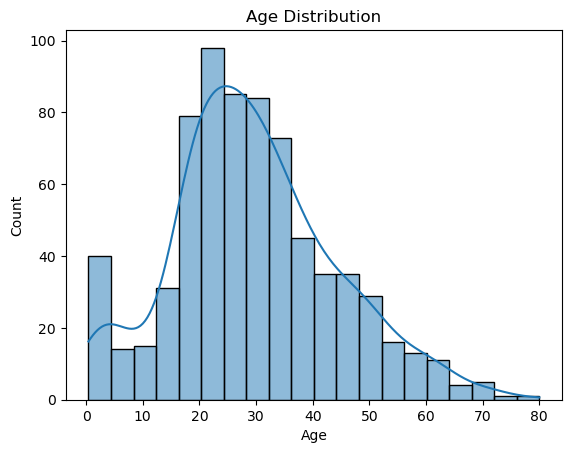

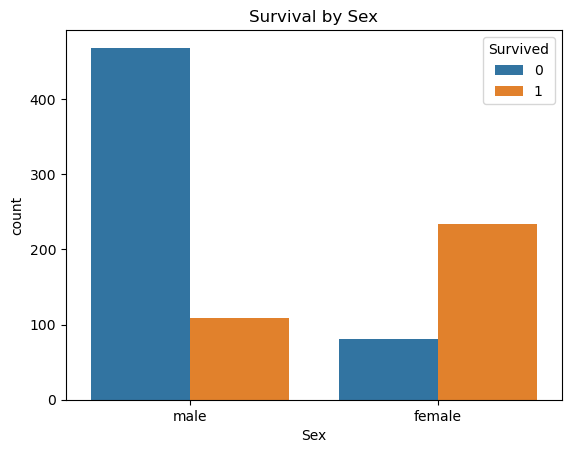

In [55]:
# Value Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical: Age distribution
sns.histplot(df["Age"].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

# Categorical: Survived vs Sex
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Sex")
plt.show()


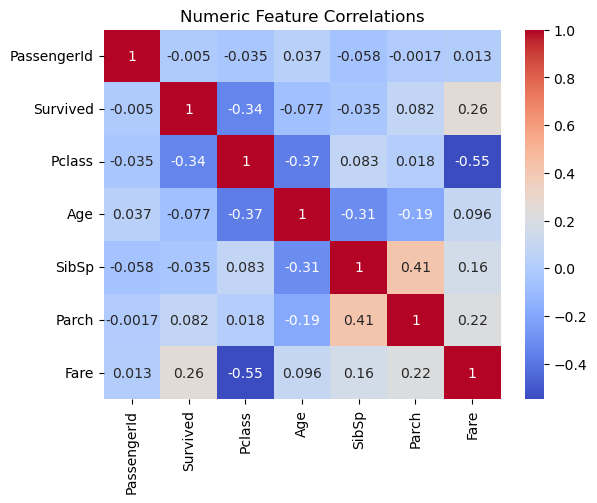

In [56]:
# Correlation heatmap
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Numeric Feature Correlations')
plt.show()